# Kansas Population Study
## Introduction
This project is a look at the population distribution of Kansas by town. ‘Town’ in this project refers to a municipality, and the list of towns and their populations comes from https://www.kansas-demographics.com/cities_by_population. 

I have always conceived of Kansas as a rural, ‘small-town’ state, and I was curious to know exactly how true this is. I created a web scraper with Selenium, `main.py`, and gathered the towns and their populations from the website and placed it in an SQLite database, `KansasPopulationStats.db`. I then used Pandas to parse the data and organize it into data frames, which I was then able to visualize as both bar and pie charts with Matplotlib. I decided to use Selenium as it is significantly faster than BeautifulSoup, and Scrapy, while even faster, is not optimized for Windows. I decided to use SQLite as the relatively small amount of data and the low complexity of the database meant that the lightweight built-in Python module sqlite3 was sufficient for my purposes; no need for a server-based database like MySQL or PostgreSQL. I used Pandas because the data frames it creates are very easy to manipulate and plug directly into a visual presentation module, and I used Matplotlib to display these visuals as it is the simplest tool for this task. I may update this in the future, and use the Seaborn extension to create more intricate, appealing visuals. 

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

After importing the modules, below is the code that retrieves the data from KansasPopulationStats.db. After getting the requested data, I put it into various Pandas data frames. 

In [6]:
conn = sqlite3.connect('KansasPopulationStats.db')

towns_info = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    """, conn)

towns_ties = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE rank LIKE '%TIE%'
    """, conn)

towns_top_ten = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE rank IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
    """, conn)

towns_above_100_000 = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE population > 100000
    """, conn)

towns_above_10_000 = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE population > 10000
    """, conn)

towns_above_1000 = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE population >= 1000
    """, conn)

towns_below_1000 = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE population < 1000
    """, conn)

towns_below_100 = pd.read_sql_query("""
    SELECT rank, town_name, population
    FROM kansas_population_stats
    WHERE population < 100
    """, conn)


towns_info_df = pd.DataFrame(towns_info, columns=['population'])
towns_ties_df = pd.DataFrame(towns_ties, columns=['population'])
towns_top_10_df = pd.DataFrame(towns_top_ten, columns=['rank', 'town_name', 'population'])
towns_above_100_000_df = pd.DataFrame(towns_above_100_000, columns=['population'])
towns_above_10_000_df = pd.DataFrame(towns_above_10_000, columns=['population'])
towns_above_1000_df = pd.DataFrame(towns_above_1000, columns=['population'])
towns_below_1000_df = pd.DataFrame(towns_below_1000, columns=['population'])
towns_below_100_df = pd.DataFrame(towns_below_100, columns=['population'])

Here is pertinent information about the population distribution of Kansas, mainly how many towns of each size there are, and what the cumulative populations of those towns are. In the sections below, I create visuals with Matplotlib to show various observations on the population of towns in Kansas. For most of the visualizations, I use both a bar chart and a pie chart, as a way to show different takes on the data. 

In [7]:
print('Total number of towns in Kansas:', len(towns_info_df))
print('Number of towns in Kansas with a tied population:', len(towns_ties_df))
print('Number of towns in Kansas with over 100,000 people:', len(towns_above_100_000_df))
print('Number of towns in Kansas with over 10,000 people:', len(towns_above_10_000_df))
print('Number of towns in Kansas with over 1,000 people:', len(towns_above_1000_df))
print('Number of towns in Kansas with under 1,000 people:', len(towns_below_1000_df))
print('Number of towns in Kansas with under 100 people:', len(towns_below_100_df))

print('\nTop ten towns:\n')
print('Rank|Name|Population')
for ind in towns_top_10_df.index:
    print(towns_top_10_df['rank'][ind], towns_top_10_df['town_name'][ind], towns_top_10_df['population'][ind])

print('\nNumber of people who live in Kansas:', towns_info_df['population'].sum())
print('Number of people who live in the top 10 towns in Kansas:', towns_top_10_df['population'].sum())
print('Number of people who live in towns with greater than 100,000 people in Kansas:', towns_above_100_000_df['population'].sum())
print('Number of people who live in towns with greater than 10,000 people in Kansas:', towns_above_10_000_df['population'].sum())
print('Number of people who live in towns with greater than 1,000 people in Kansas:', towns_above_1000_df['population'].sum())
print('Number of people who live in towns with fewer than 1,000 people in Kansas:', towns_below_1000_df['population'].sum())
print('Number of people who live in towns with fewer than 100 people in Kansas:', towns_below_100_df['population'].sum())

Total number of towns in Kansas: 668
Number of towns in Kansas with a tied population: 286
Number of towns in Kansas with over 100,000 people: 5
Number of towns in Kansas with over 10,000 people: 35
Number of towns in Kansas with over 1,000 people: 195
Number of towns in Kansas with under 1,000 people: 473
Number of towns in Kansas with under 100 people: 126

Top ten towns:

Rank|Name|Population
1 Wichita 389938
2 Overland Park 195494
3 Kansas City 152960
4 Olathe 140545
5 Topeka 125310
6 Lawrence 98193
7 Shawnee 65807
8 Lenexa 55625
9 Manhattan 54604
10 Salina 46550

Number of people who live in Kansas: 2438220
Number of people who live in the top 10 towns in Kansas: 1325026
Number of people who live in towns with greater than 100,000 people in Kansas: 1004247
Number of people who live in towns with greater than 10,000 people in Kansas: 1818887
Number of people who live in towns with greater than 1,000 people in Kansas: 2299980
Number of people who live in towns with fewer than 1,000 

# All Towns Compared to Tied Towns

In this section I was curious how many towns in Kansas have the same population as another (‘tied’) and compare this to the total number of towns. As you can see, there are a significant number of towns in Kansas that have the same number of people. 

## Bar Chart

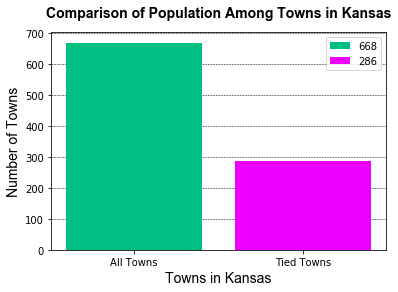

In [13]:
titles = ['All Towns', 'Tied Towns']
values = [len(towns_info_df), len(towns_ties_df)]
colors = ['#00bf83', '#ee00ff']
for title, value, color in zip(titles, values, colors):
    plt.bar(title, value, color=color, label=value, zorder=2)

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Towns in Kansas', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.ylabel('Number of Towns', fontdict={'fontname': 'Arial', 'fontsize': 14})

plt.title('Comparison of Population Among Towns in Kansas', pad=15, fontdict={
    'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend()
plt.show()

I decided to visualize this in a different way, as a pie chart. Because I am comparing values that add up to 100%, using a pie chart makes sense. 

## Pie Chart

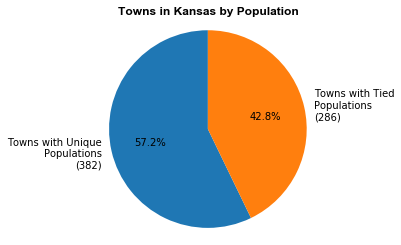

In [9]:
values = [len(towns_info_df) - len(towns_ties_df), len(towns_ties_df)]
titles = [f'Towns with Unique\nPopulations\n({values[0]})', f'Towns with Tied\nPopulations\n({values[1]})']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=titles, shadow=False, autopct='%1.01f%%', startangle=90)
ax1.axis('equal')

plt.title('Towns in Kansas by Population', fontdict={'fontname':'Arial', 'fontweight':'bold', 'fontsize':12})
plt.show()

# All Towns Compared to Towns with Fewer than 1,000 People, 100 People

## Bar Chart

Here, I am comparing the number of towns in Kansas to the number of towns that have fewer than 1,000 and 100 people, respectively. Note, the bar for towns with below 1,000 people includes the towns with below 100 people within it. This shows just how many towns can be considered small in Kansas, with the solid majority of towns having populations below 1,000.  

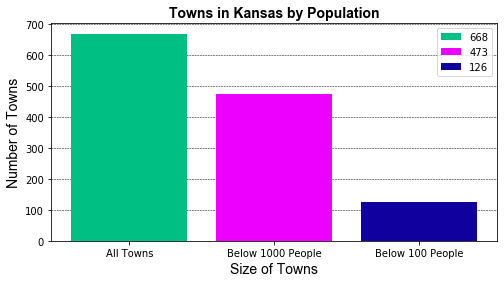

In [12]:
plt.figure(figsize=(8, 4))

titles = ['All Towns', 'Below 1000 People', 'Below 100 People']
values = [len(towns_info_df), len(towns_below_1000_df), len(towns_below_100_df)]
colors = ['#00bf83', '#ee00ff', '#10009e']
for title, value, color in zip(titles, values, colors):
    plt.bar(title, value, color=color, label=value, zorder=2)

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Size of Towns', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.ylabel('Number of Towns', fontdict={'fontname': 'Arial', 'fontsize': 14})

plt.title('Towns in Kansas by Population', fontdict={'fontname':'Arial', 'fontweight':'bold', 'fontsize':14})
plt.legend()
plt.show()

## Pie Chart

The use of pie charts here is, as in the last section, advantageous because it is suited for showing values that add up to 100%. Again, you can clearly see that small towns make up an outsized portion of the towns in the state, which seems to support the characterization of Kansas as being a ‘small town’ state.

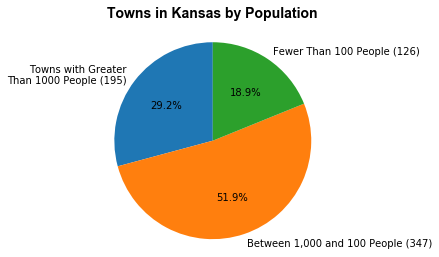

In [5]:
values = [len(towns_info_df) - len(towns_below_1000_df), len(towns_below_1000_df) - len(towns_below_100_df), len(towns_below_100_df)]
titles = [f'Towns with Greater\nThan 1000 People ({values[0]})', f'Between 1,000 and 100 People ({values[1]})', f'Fewer Than 100 People ({values[2]})']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=titles, shadow=False, autopct='%1.01f%%', startangle=90)
ax1.axis('equal')

plt.title('Towns in Kansas by Population', fontdict={'fontname':'Arial', 'fontweight':'bold', 'fontsize':14}, pad=15)
plt.show()

# Population Kansas Compared to Population of Towns with Below 1,000 People, 100 People

Let’s look at the population of the towns and see if this characterization holds. 

## Bar Chart

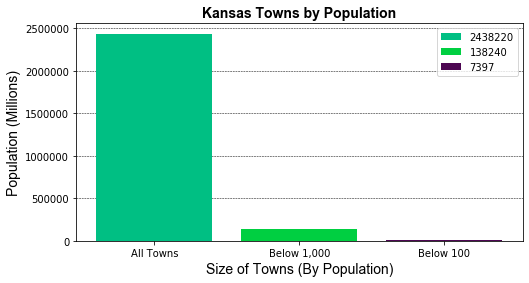

In [23]:
plt.figure(figsize=(8, 4))

titles = ['All Towns', 'Below 1,000', 'Below 100']
values = [towns_info_df['population'].sum(), towns_below_1000_df['population'].sum(),
        towns_below_100_df['population'].sum()]
colors = ['#00bf83', '#00cf41', '#4d0752']
for title, value, color in zip(titles, values, colors):
    plt.bar(title, value, color=color, label=value, zorder=2)

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Size of Towns (By Population)', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.ylabel('Population', fontdict={'fontname': 'Arial', 'fontsize': 14})

plt.title('Kansas Towns by Population', fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})
plt.legend()
plt.show()

Above we see that while towns with under 1,000 people make up a majority of all towns in the state, they represent a very small percent of the actual population. This is even more clear in the pie chart, with the percentages, below. 94.3% of all people in Kansas live in a town that has 1,000 people or more. This contests the small town character of the state, and makes that characterization less clear-cut. 

## Pie Chart

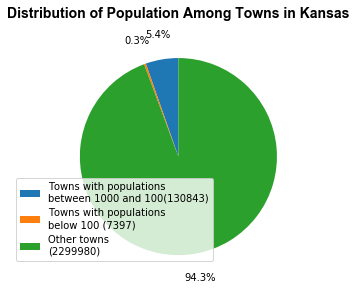

In [8]:
import matplotlib.transforms as mtrans

trans = mtrans.Affine2D().translate(20, 0)

values = [towns_below_1000_df['population'].sum() - towns_below_100_df['population'].sum(), towns_below_100_df['population'].sum(), towns_info_df['population'].sum() - towns_below_1000_df['population'].sum()]
titles = [f'Towns with populations\nbetween 1000 and 100({values[0]})', f'Towns with populations\nbelow 100 ({values[1]})', f'Other towns\n({values[2]})']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=None, shadow=False, autopct='%1.01f%%', pctdistance=1.25, startangle=90)
ax1.axis('equal')

plt.title('Distribution of Population Among Towns in Kansas', pad=30, fontdict={
        'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})

plt.legend(loc=3, labels=titles)
plt.show()

# Population of Kansas Compared to Population of Top 10 Towns, Towns over 100,000

Now let’s look at the larger towns in Kansas, first the top 10 and then the towns with greater than 100,000 people. 

## Bar Chart

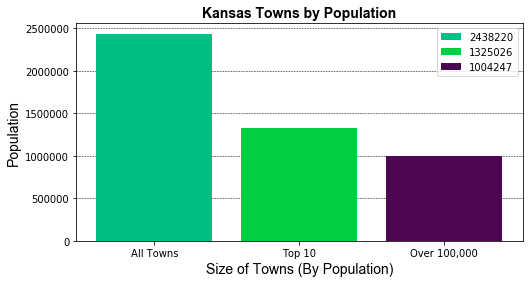

In [19]:
plt.figure(figsize=(8, 4))

titles = ['All Towns', 'Top 10', 'Over 100,000']
values = [towns_info_df['population'].sum(), towns_top_10_df['population'].sum(), towns_above_100_000_df['population'].sum()]
colors = ['#00bf83', '#00cf41', '#4d0752']
for title, value, color in zip(titles, values, colors):
    plt.bar(title, value, color=color, label=value, zorder=2)

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Size of Towns (By Population)', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.ylabel('Population', fontdict={'fontname': 'Arial', 'fontsize': 14})

plt.title('Kansas Towns by Population', fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})
plt.legend()
plt.show()

Above, the bar chart shows that the larger towns account for a much larger percentage of the state’s population, despite there being far fewer of them. This is made even more clear below in the pie charts, as over half of all people in Kansas live in one of the top 10 towns, and over 40% live in a town with over 100,000 people. 

## Pie Chart for Top 10

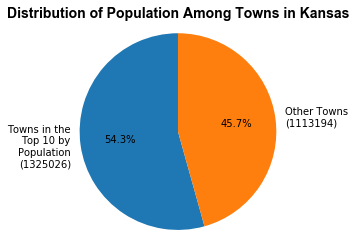

In [21]:
values = [towns_top_10_df['population'].sum(), towns_info_df['population'].sum() - towns_top_10_df['population'].sum()]
titles = [f'Towns in the\nTop 10 by\nPopulation\n({values[0]})', f'Other Towns\n({values[1]})']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=titles, shadow=False, autopct='%1.01f%%', startangle=90)
ax1.axis('equal')

plt.title('Distribution of Population Among Towns in Kansas', fontdict={'fontname':'Arial', 'fontweight':'bold', 'fontsize':14})
plt.show()

## Pie Chart for Populations above 100,000

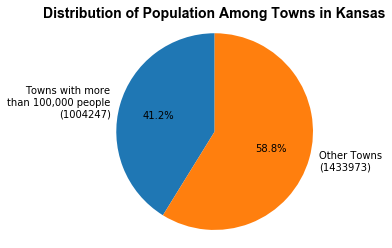

In [22]:
values = [towns_above_100_000_df['population'].sum(), towns_info_df['population'].sum() - towns_above_100_000_df['population'].sum()]
titles = [f'Towns with more\nthan 100,000 people\n({values[0]})', f'Other Towns\n({values[1]})',]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=titles, shadow=False, autopct='%1.01f%%', startangle=90)
ax1.axis('equal')

plt.title('Distribution of Population Among Towns in Kansas', fontdict={'fontname':'Arial', 'fontweight':'bold', 'fontsize':14})
plt.show()

# Top 10 Towns in Kansas by Population

Finally, for fun, we see below the names and populations of the top 10 towns in Kansas by population. For these, we will only be using a bar chart. There is limited value in using a pie chart, as the values do not add up to 100% here.

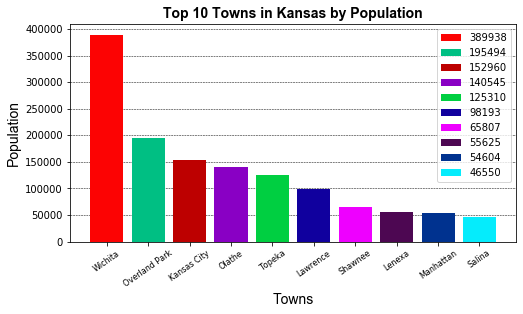

In [17]:
plt.figure(figsize=(8, 4))

for ind in towns_top_10_df.index:
    labels = [towns_top_10_df['town_name'][ind]]
    values = [towns_top_10_df['population'][ind]]
    colors = ['#fc0303', '#00bf83', '#bd0000', '#8900c4', '#00cf41', '#10009e', '#ee00ff', '#4d0752', '#00328f', '#05ecfc']
    plt.bar(labels, values, color=colors[ind], label=towns_top_10_df['population'][ind], zorder=2)

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.xlabel('Towns', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.ylabel('Population', fontdict={'fontname': 'Arial', 'fontsize': 14})
plt.xticks(rotation=35, fontsize=8)

plt.title('Top 10 Towns in Kansas by Population', fontdict={'fontname': 'Arial', 'fontweight': 'bold', 'fontsize': 14})
plt.legend()
plt.show()

# Overall Observation

The results show that while the number of small towns in Kansas dwarf the number of large towns, the population of the state is much more concentrated in the large towns. Less than 6% of the state’s population lives in a town with fewer than 1,000 residents, while over 50% of the population lives in one of the top 10 most populous towns. This complicates the characterization of Kansas as a ‘small town’ state. 